In [113]:
import pandas as pd
from matplotlib import pyplot as plt

In [114]:
data = pd.read_csv('D2.csv')

In [115]:
df = data.copy()

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [117]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [118]:
df.drop("Person ID",axis=1,inplace=True)

In [119]:
cols = ['Gender','Occupation','BMI Category','Sleep Disorder']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int32  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int32  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int32  
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    int32  
dtypes: float64(1), int32(4), int64(6), object(1)
memory usage: 29.3+ KB


In [121]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

In [122]:
df.drop("Blood Pressure",axis=1,inplace=True)

In [123]:
df[['Systolic', 'Diastolic']] = df[['Systolic', 'Diastolic']].astype(int)

In [124]:
# Custom function to encode blood pressure into levels
def encode_bp_level(row):
    systolic = row['Systolic']
    diastolic = row['Diastolic']
    
    if systolic >= 140 or diastolic >= 90:
        return 'High'
    elif systolic <= 90 or diastolic <= 60:
        return 'Low'
    else:
        return 'Normal'

# Apply the custom function to create a new column 'BP_Level'
df['BP_Level'] = df.apply(encode_bp_level, axis=1)

In [125]:
df.drop(["Systolic","Diastolic"],axis=1,inplace=True)

In [126]:
df["BP_Level"] = le.fit_transform(df['BP_Level'])

In [127]:
df['Daily Steps'] = df['Daily Steps']/1000.0

In [128]:
#trans minute to hour
df['Physical Activity Level'] = df['Physical Activity Level']/60.0
df['Heart Rate'] = df['Heart Rate']/60.0

In [129]:
# Round the float values to two decimal places
df[['Physical Activity Level','Heart Rate']] = df[['Physical Activity Level','Heart Rate']].round(2)

In [139]:
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
BP_Level                   0
dtype: int64

In [130]:
from sklearn.model_selection import train_test_split
X = df.drop(['Sleep Disorder'],axis=1)
Y = df['Sleep Disorder']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [131]:
X_train.shape

(299, 11)

In [132]:
X_train.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,BP_Level
196,1,43,7,6.5,6,0.75,7,3,1.20,6.0,1
33,1,31,1,6.1,6,0.50,8,0,1.20,5.0,1
128,1,38,3,7.3,8,1.00,5,0,1.13,8.0,1
127,0,38,0,7.1,8,1.00,4,0,1.13,7.0,1
131,1,38,3,7.3,8,1.00,5,0,1.13,8.0,1


In [133]:
#ANN
import tensorflow as tf
from tensorflow import keras

In [134]:
model = keras.models.Sequential()
activation = 'relu'
model.add(keras.layers.Flatten(input_shape=[11]))
model.add(keras.layers.Dense(11,activation=activation))
model.add(keras.layers.Dense(6,activation=activation))
model.add(keras.layers.Dense(3,activation="softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 11)                0         
                                                                 
 dense_18 (Dense)            (None, 11)                132       
                                                                 
 dense_19 (Dense)            (None, 6)                 72        
                                                                 
 dense_20 (Dense)            (None, 3)                 21        
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [136]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 300,callbacks=early_stopping)

Epoch 1/300
10/10 [==============================] - 2s 48ms/step - loss: 1.0069 - accuracy: 0.5886 - val_loss: 0.8906 - val_accuracy: 0.5733
Epoch 2/300
10/10 [==============================] - 0s 13ms/step - loss: 0.9416 - accuracy: 0.5886 - val_loss: 0.8777 - val_accuracy: 0.5733
Epoch 3/300
10/10 [==============================] - 0s 12ms/step - loss: 0.9097 - accuracy: 0.6020 - val_loss: 0.8777 - val_accuracy: 0.6533
Epoch 4/300
10/10 [==============================] - 0s 15ms/step - loss: 0.8883 - accuracy: 0.5886 - val_loss: 0.8442 - val_accuracy: 0.5733
Epoch 5/300
10/10 [==============================] - 0s 15ms/step - loss: 0.8669 - accuracy: 0.5886 - val_loss: 0.8187 - val_accuracy: 0.5733
Epoch 6/300
10/10 [==============================] - 0s 15ms/step - loss: 0.8432 - accuracy: 0.5886 - val_loss: 0.7952 - val_accuracy: 0.5733
Epoch 7/300
10/10 [==============================] - 0s 16ms/step - loss: 0.8192 - accuracy: 0.5886 - val_loss: 0.7594 - val_accuracy: 0.5733
Epoch 

10/10 [==============================] - 0s 10ms/step - loss: 0.5860 - accuracy: 0.8629 - val_loss: 0.5126 - val_accuracy: 0.9333
Epoch 59/300
10/10 [==============================] - 0s 12ms/step - loss: 0.5827 - accuracy: 0.8595 - val_loss: 0.5053 - val_accuracy: 0.9333
Epoch 60/300
10/10 [==============================] - 0s 11ms/step - loss: 0.5800 - accuracy: 0.8562 - val_loss: 0.5045 - val_accuracy: 0.9333
Epoch 61/300
10/10 [==============================] - 0s 11ms/step - loss: 0.5786 - accuracy: 0.8562 - val_loss: 0.5021 - val_accuracy: 0.9333
Epoch 62/300
10/10 [==============================] - 0s 10ms/step - loss: 0.5783 - accuracy: 0.8629 - val_loss: 0.5004 - val_accuracy: 0.9333
Epoch 63/300
10/10 [==============================] - 0s 10ms/step - loss: 0.5819 - accuracy: 0.8662 - val_loss: 0.5097 - val_accuracy: 0.9200
Epoch 64/300
10/10 [==============================] - 0s 12ms/step - loss: 0.5741 - accuracy: 0.8796 - val_loss: 0.4998 - val_accuracy: 0.9467
Epoch 65/300

10/10 [==============================] - 0s 10ms/step - loss: 0.4852 - accuracy: 0.8696 - val_loss: 0.3817 - val_accuracy: 0.9333
Epoch 116/300
10/10 [==============================] - 0s 12ms/step - loss: 0.4826 - accuracy: 0.8696 - val_loss: 0.3805 - val_accuracy: 0.9333
Epoch 117/300
10/10 [==============================] - 0s 10ms/step - loss: 0.4829 - accuracy: 0.8696 - val_loss: 0.3873 - val_accuracy: 0.9333
Epoch 118/300
10/10 [==============================] - 0s 11ms/step - loss: 0.4812 - accuracy: 0.8729 - val_loss: 0.3833 - val_accuracy: 0.9333
Epoch 119/300
10/10 [==============================] - 0s 12ms/step - loss: 0.4813 - accuracy: 0.8696 - val_loss: 0.3835 - val_accuracy: 0.9333
Epoch 119: early stopping


3/3 [==============================] - 0s 9ms/step
accuracy : 0.9333333333333333
precision : 0.9314814814814815
recall : 0.914470284237726


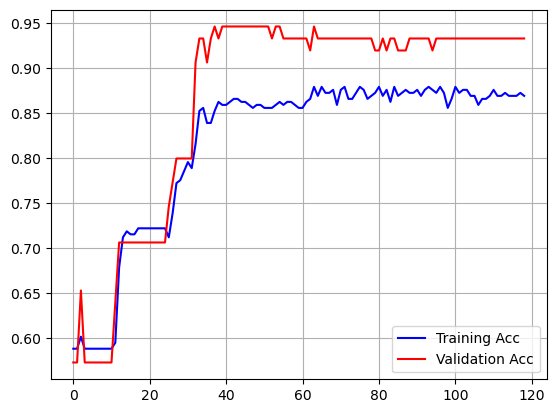

In [137]:
plt.plot(history.history["accuracy"],c='b')
plt.plot(history.history["val_accuracy"],c='r')
plt.grid()
plt.legend(["Training Acc","Validation Acc"])

import sklearn.metrics as metrics
import numpy as np
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
#print(y_pred)

acc = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average='macro')
recall = metrics.recall_score(y_test,y_pred,average='macro')

print(f'accuracy : {acc}')
print(f'precision : {precision}')
print(f'recall : {recall}')

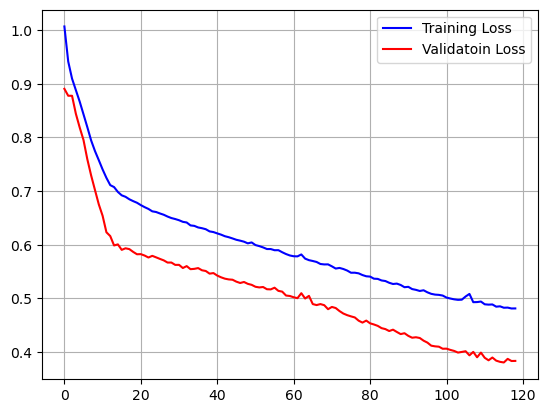

In [138]:
plt.plot(history.history['loss'],c = "b")
plt.plot(history.history["val_loss"],c ="r")
plt.grid()
plt.legend(["Training Loss","Validatoin Loss"])